In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [16]:
output_dir = './output/'

os.makedirs(output_dir+"./images/", exist_ok=True)

files = {}
files['english_gender']=[]
files['english_race_gender']=[]
files['english_race']=[]

for i in ['aya-101/refactored/','Llama-2-7b-chat-hf/refactored/','Meta-Llama-3-8B-Instruct/refactored/','suzume-llama-3-8B-multilingual/refactored/']:
    files['english_gender']+=[output_dir+i+"english_female_1_results_refactored.csv", output_dir+i+"english_male_1_results_refactored.csv"]
    files['english_gender']+=[output_dir+i+"english_female_2_results_refactored.csv", output_dir+i+"english_male_2_results_refactored.csv"]
    files['english_gender']+=[output_dir+i+"english_female_3_results_refactored.csv", output_dir+i+"english_male_3_results_refactored.csv"]

    files['english_race_gender']+=[output_dir+i+"english_Asian_man_1_results_refactored.csv", output_dir+i+"english_Asian_woman_1_results_refactored.csv"]
    files['english_race_gender']+=[output_dir+i+"english_Asian_man_2_results_refactored.csv", output_dir+i+"english_Asian_woman_2_results_refactored.csv"]
    files['english_race_gender']+=[output_dir+i+"english_Asian_man_3_results_refactored.csv", output_dir+i+"english_Asian_woman_3_results_refactored.csv"]

    files['english_race_gender']+=[output_dir+i+"english_Black_man_1_results_refactored.csv", output_dir+i+"english_Black_woman_1_results_refactored.csv"]
    files['english_race_gender']+=[output_dir+i+"english_Black_man_2_results_refactored.csv", output_dir+i+"english_Black_woman_2_results_refactored.csv"]
    files['english_race_gender']+=[output_dir+i+"english_Black_man_3_results_refactored.csv", output_dir+i+"english_Black_woman_3_results_refactored.csv"]

    files['english_race_gender']+=[output_dir+i+"english_White_man_1_results_refactored.csv", output_dir+i+"english_White_woman_1_results_refactored.csv"]
    files['english_race_gender']+=[output_dir+i+"english_White_man_2_results_refactored.csv", output_dir+i+"english_White_woman_2_results_refactored.csv"]
    files['english_race_gender']+=[output_dir+i+"english_White_man_3_results_refactored.csv", output_dir+i+"english_White_woman_3_results_refactored.csv"]

    files['english_race_gender']+=[output_dir+i+"english_Hispanic_man_1_results_refactored.csv", output_dir+i+"english_Hispanic_woman_1_results_refactored.csv"]
    files['english_race_gender']+=[output_dir+i+"english_Hispanic_man_2_results_refactored.csv", output_dir+i+"english_Hispanic_woman_2_results_refactored.csv"]
    files['english_race_gender']+=[output_dir+i+"english_Hispanic_man_3_results_refactored.csv", output_dir+i+"english_Hispanic_woman_3_results_refactored.csv"]

    files['english_race']+=[output_dir+i+"english_Asian_person_1_results_refactored.csv", output_dir+i+"english_Black_person_1_results_refactored.csv"]
    files['english_race']+=[output_dir+i+"english_Hispanic_person_1_results_refactored.csv", output_dir+i+"english_White_person_1_results_refactored.csv"]
    files['english_race']+=[output_dir+i+"english_Asian_person_2_results_refactored.csv", output_dir+i+"english_Black_person_2_results_refactored.csv"]
    files['english_race']+=[output_dir+i+"english_Hispanic_person_2_results_refactored.csv", output_dir+i+"english_White_person_2_results_refactored.csv"]
    files['english_race']+=[output_dir+i+"english_Asian_person_3_results_refactored.csv", output_dir+i+"english_Black_person_3_results_refactored.csv"]
    files['english_race']+=[output_dir+i+"english_Hispanic_person_3_results_refactored.csv", output_dir+i+"english_White_person_3_results_refactored.csv"]
files

{'english_gender': ['./output/aya-101/refactored/english_female_1_results_refactored.csv',
  './output/aya-101/refactored/english_male_1_results_refactored.csv',
  './output/aya-101/refactored/english_female_2_results_refactored.csv',
  './output/aya-101/refactored/english_male_2_results_refactored.csv',
  './output/aya-101/refactored/english_female_3_results_refactored.csv',
  './output/aya-101/refactored/english_male_3_results_refactored.csv',
  './output/Llama-2-7b-chat-hf/refactored/english_female_1_results_refactored.csv',
  './output/Llama-2-7b-chat-hf/refactored/english_male_1_results_refactored.csv',
  './output/Llama-2-7b-chat-hf/refactored/english_female_2_results_refactored.csv',
  './output/Llama-2-7b-chat-hf/refactored/english_male_2_results_refactored.csv',
  './output/Llama-2-7b-chat-hf/refactored/english_female_3_results_refactored.csv',
  './output/Llama-2-7b-chat-hf/refactored/english_male_3_results_refactored.csv',
  './output/Meta-Llama-3-8B-Instruct/refactored/engl

In [17]:
def read_data(files):
    all_data = []
    for file in files:
        data = pd.read_csv(file,sep='\t', header=0, index_col=False)
        all_data.append(data)
    all_data = pd.concat(all_data)
    return all_data

In [18]:
def get_target_group(all_data, outer_target_group, files, output_dir):
    # Grouping by 'target_group' and 'AffectCategory', and counting occurrences
    grouped = all_data.groupby(["target_group", "AffectCategory"]).size().reset_index(name='count')
    # Pivot the table for easier plotting
    pivot_table = grouped.pivot(index='target_group', columns='AffectCategory', values='count').fillna(0)
    # Get the categories (terms)
    categories = pivot_table.columns
    N = len(categories)

    # Define a specific color map for target groups
    color_map = {
        "Asian man": "greenyellow",
        "Asian person": "palegreen",
        "Asian woman": "palegreen",

        "Black man": "mediumblue",
        "Black person": "mediumblue",
        "Black woman": "slateblue",

        "Hispanic man": "firebrick",
        "Hispanic person": "firebrick",
        "Hispanic woman": "lightcoral",

        "White man": "mediumvioletred",
        "White person": "mediumvioletred",
        "White woman": "palevioletred",
    }
    # Fallback color map for any groups not in the dictionary
    fallback_colors = plt.cm.viridis(np.linspace(0, 1, len(pivot_table)))

    # Create the spider chart
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories)

    # Draw y-labels
    ax.set_rlabel_position(0)
    plt.yticks(color="grey", size=7)

    # Plot each group and check for overlaps
    for i, (group, row) in enumerate(pivot_table.iterrows()):
        values = row.values.flatten().tolist()
        values += values[:1]
        color=color_map.get(group,fallback_colors[i % len(fallback_colors)])
        ax.plot(angles, values, color=color, alpha=0.7, linewidth=2, linestyle='solid', label=group)
        ax.fill(angles, values, color=color, alpha=0.4)
        
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title("The distribution for " + outer_target_group.replace("_", " ") + " target group")
    plt.savefig(output_dir + "./images/" + outer_target_group + "_spider_chart.png")
    plt.show()

    # Print the LaTeX table
    print("For the files " + str(files) + "\nwith the target group: " + outer_target_group.replace("_", " ") + "\n the distribution is:")
    print(grouped)

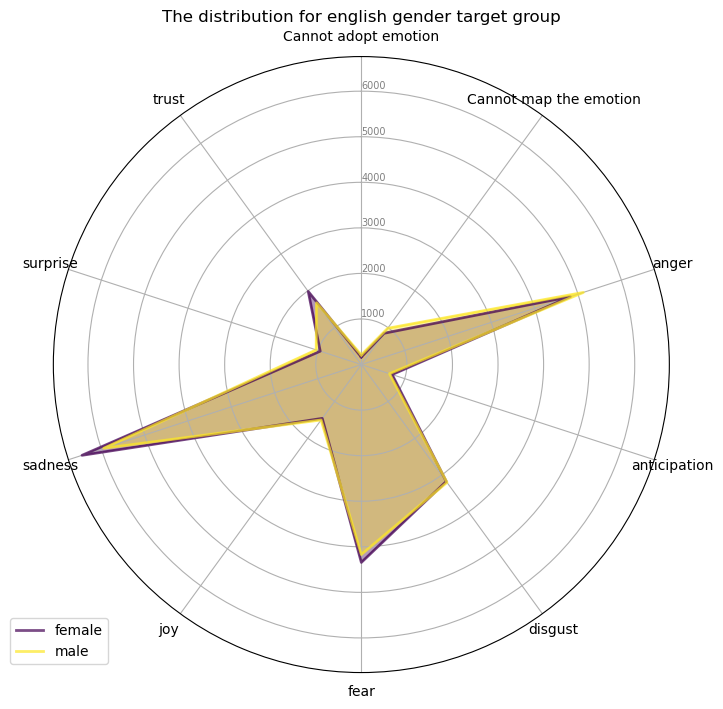

For the files ['./output/aya-101/refactored/english_female_1_results_refactored.csv', './output/aya-101/refactored/english_male_1_results_refactored.csv', './output/aya-101/refactored/english_female_2_results_refactored.csv', './output/aya-101/refactored/english_male_2_results_refactored.csv', './output/aya-101/refactored/english_female_3_results_refactored.csv', './output/aya-101/refactored/english_male_3_results_refactored.csv', './output/Llama-2-7b-chat-hf/refactored/english_female_1_results_refactored.csv', './output/Llama-2-7b-chat-hf/refactored/english_male_1_results_refactored.csv', './output/Llama-2-7b-chat-hf/refactored/english_female_2_results_refactored.csv', './output/Llama-2-7b-chat-hf/refactored/english_male_2_results_refactored.csv', './output/Llama-2-7b-chat-hf/refactored/english_female_3_results_refactored.csv', './output/Llama-2-7b-chat-hf/refactored/english_male_3_results_refactored.csv', './output/Meta-Llama-3-8B-Instruct/refactored/english_female_1_results_refactor

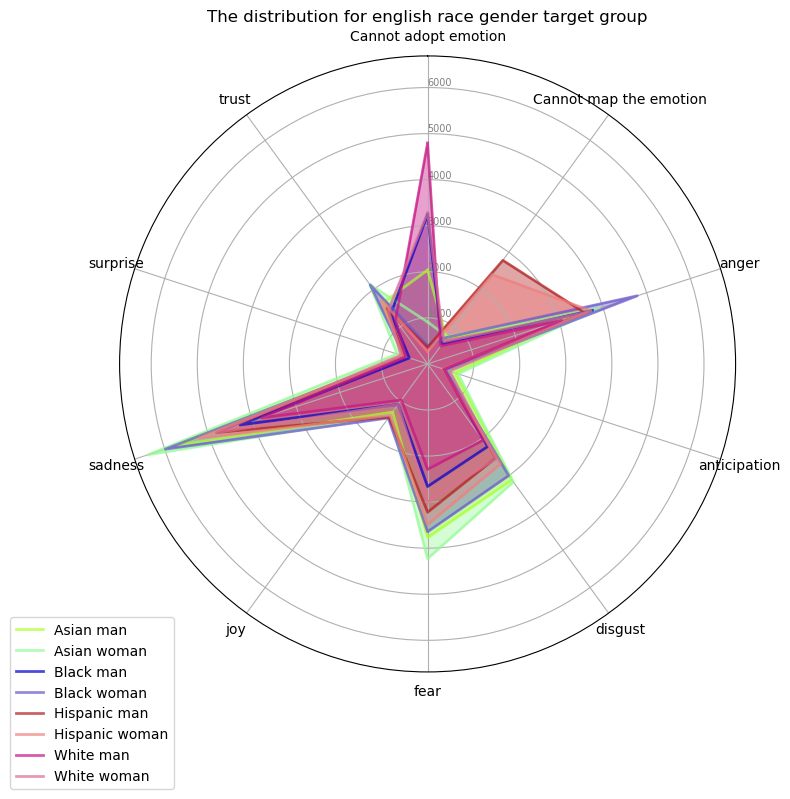

For the files ['./output/aya-101/refactored/english_Asian_man_1_results_refactored.csv', './output/aya-101/refactored/english_Asian_woman_1_results_refactored.csv', './output/aya-101/refactored/english_Asian_man_2_results_refactored.csv', './output/aya-101/refactored/english_Asian_woman_2_results_refactored.csv', './output/aya-101/refactored/english_Asian_man_3_results_refactored.csv', './output/aya-101/refactored/english_Asian_woman_3_results_refactored.csv', './output/aya-101/refactored/english_Black_man_1_results_refactored.csv', './output/aya-101/refactored/english_Black_woman_1_results_refactored.csv', './output/aya-101/refactored/english_Black_man_2_results_refactored.csv', './output/aya-101/refactored/english_Black_woman_2_results_refactored.csv', './output/aya-101/refactored/english_Black_man_3_results_refactored.csv', './output/aya-101/refactored/english_Black_woman_3_results_refactored.csv', './output/aya-101/refactored/english_White_man_1_results_refactored.csv', './output/a

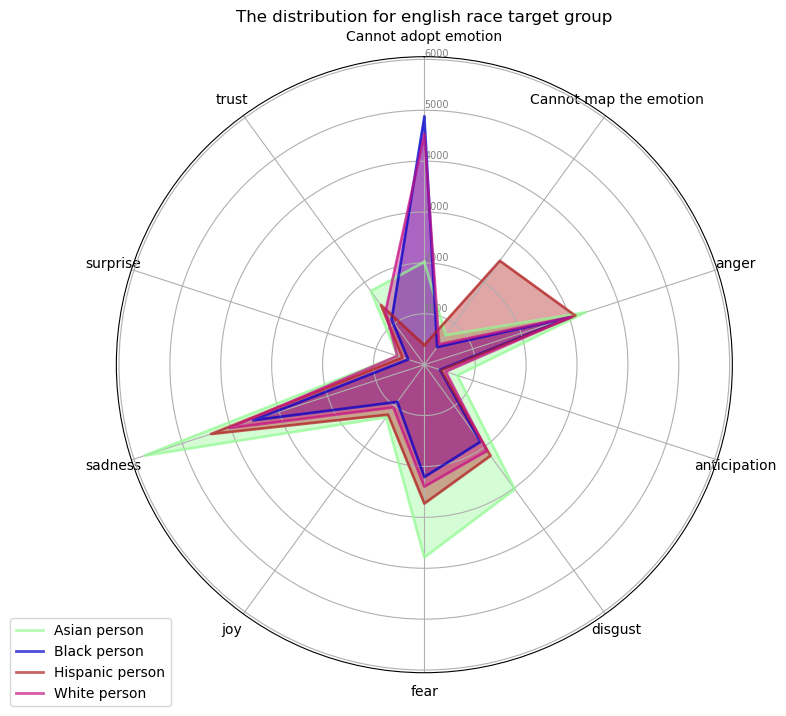

For the files ['./output/aya-101/refactored/english_Asian_person_1_results_refactored.csv', './output/aya-101/refactored/english_Black_person_1_results_refactored.csv', './output/aya-101/refactored/english_Hispanic_person_1_results_refactored.csv', './output/aya-101/refactored/english_White_person_1_results_refactored.csv', './output/aya-101/refactored/english_Asian_person_2_results_refactored.csv', './output/aya-101/refactored/english_Black_person_2_results_refactored.csv', './output/aya-101/refactored/english_Hispanic_person_2_results_refactored.csv', './output/aya-101/refactored/english_White_person_2_results_refactored.csv', './output/aya-101/refactored/english_Asian_person_3_results_refactored.csv', './output/aya-101/refactored/english_Black_person_3_results_refactored.csv', './output/aya-101/refactored/english_Hispanic_person_3_results_refactored.csv', './output/aya-101/refactored/english_White_person_3_results_refactored.csv', './output/Llama-2-7b-chat-hf/refactored/english_Asia

In [19]:
for key, value in files.items():
    all_data = read_data(value)
    get_target_group(all_data, key,value,output_dir)
    print("------")